In [84]:
import math

omega = .6
p_priv = 101
p_curr = 100
K = .000001
W_0 = 1000000000000
C_0 = 400000000000
S_0 = 600000000000

# Profit if you just held
print(C_0 + ((p_priv/p_curr)*S_0))


profit = 0
market_price = p_curr
i = 1
while market_price < p_priv:
    S_0 = S_0 * (1+K)
    market_price = market_price*(1+K)
    sig_quality = (p_priv - market_price) / market_price
    wealth = (W_0*((1+omega*K)**i))
    dollars_sold = omega * (K) * (1-omega) * wealth
    S_0 = omega*wealth
    C_0 = (1-omega)*wealth
    omega_new = S_0 / (S_0 + C_0)
    assert math.isclose(omega_new, 0.6, rel_tol=1e-5), f"omega_new is not close to 0.6, it's {omega_new}"
    # print(market_price, sig_quality, dollars_sold, wealth)
    trade_profit = (sig_quality) * dollars_sold
    profit += trade_profit
    i += 1

print(C_0 + S_0)
print(profit)
print(profit + C_0 + S_0)

1006000000000.0
1005988457755.7372
11943139.576254884
1006000400895.3135


99.5082836142032
1005988175778.4324
Total sales: $-2,407,286,419.17


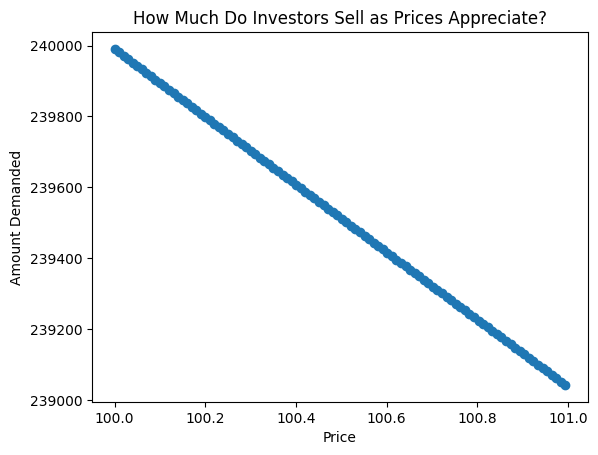

In [59]:
def risky_sale(desired_risky_allocation, current_cash, current_risky, risky_return):
    return (omega*risky_return*(omega-1)*(current_cash + current_risky))

import matplotlib.pyplot as plt
import numpy as np
private_price = 101
initial_price = 100.00
initial_cash = 400000000000
initial_risky = 600000000000
omega = initial_risky / (initial_risky + initial_cash)

p_i = initial_price
p_prev = initial_price

risky_i = initial_risky
cash_i = initial_cash

k= .0001
n =(np.log(private_price/initial_price)) / (np.log(1 + k))
print(n)

wealth_end = ((1 + omega*k)**(n))*(initial_risky+initial_cash)
print(wealth_end)
risky_sales = []
prices = []
wealth = []
profit = []
risky = []

a_profit = 0
while p_i <= private_price:
    # penny increments can change this to reflect when investors rebalance
    p_prev = p_i
    prices.append(p_i)
    p_i = p_prev*(1+k)
    risky_return = (p_i - p_prev) / p_prev
    risky_i = risky_i * (1+risky_return)
    # Investor Sells so transfer risky to cash then assert omega is maintained
    supply = risky_sale(omega, cash_i, risky_i, risky_return)
    risky_i = risky_i + supply
    cash_i = cash_i - supply
    wealth.append((risky_i + cash_i))
    risky.append(risky_i)
    # print((risky_i) / (risky_i + cash_i))
    risky_sales.append(supply)

  oracle_profit = (private_price - initial_price)*(-supply/p_i)
  if oracle_profit > 0:
      a_profit += oracle_profit
  # print(oracle_profit)
  profit.append(oracle_profit)

In [61]:
a_profit

23951588.759930607

In [35]:
active_profit

238563990.71171847

In [48]:
wealth_end + a_profit

10060119240770.791

In [44]:
active_profit

<function __main__.active_profit(p_curr, p_priv, omega, K, W_0)>